피어슨 상관계수 ( 의료시설 수 ): -0.22118048241224303
피어슨 상관계수 ( 대중교통만족도 ): -0.024585098862924027
피어슨 상관계수 ( 문화시설 수 ): -0.08326167148777945
피어슨 상관계수 ( 경제력 ): -0.04180423063953908
피어슨 상관계수 ( 주택가격 안정화지수 ): -0.07884179043161774
피어슨 상관계수 ( 1인당 녹지 면적 ): 0.02193903637970422
피어슨 상관계수 ( 전체녹지 ): -0.13763641573897403
피어슨 상관계수 ( 상업시설 수 ): 0.10323444634398407
피어슨 상관계수 ( 주거환경만족도 ): 1.0


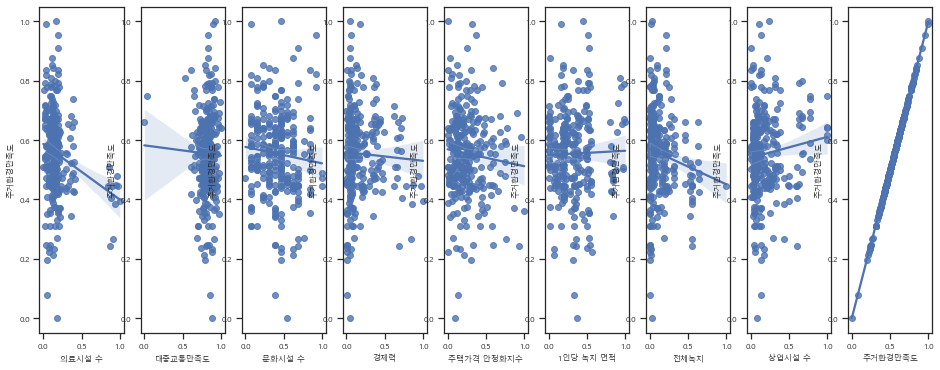

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가

df = pd.read_excel("life_data.xlsx")
label_name = '주거환경만족도'
cols = [ '의료시설 수', '대중교통만족도', '문화시설 수', '경제력', '주택가격 안정화지수', '1인당 녹지 면적', '전체녹지', '상업시설 수', '주거환경만족도']

def pearson_correlation(x, y):
    # 입력 변수 x와 y의 길이가 동일한지 확인
    if len(x) != len(y):
        raise ValueError("두 변수는 길이가 동일해야 합니다.")
    n = len(x)  # 변수의 개수
    # 평균 계산
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    # 분자 계산
    numerator = sum((x - mean_x) * (y - mean_y))
    # 분모 계산
    denominator = np.sqrt(sum((x - mean_x)**2) * sum((y - mean_y)**2))
    # 피어슨 상관계수 계산
    correlation = numerator / denominator
    return correlation
for i in range(len(cols)):
    x = df[cols[i]]
    y = df[label_name]
    correlation_coefficient = pearson_correlation(x, y)
    print("피어슨 상관계수","(",cols[i],"):", correlation_coefficient)

font_path = "C:/Windows/Fonts/malgunsl.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

df = pd.DataFrame(df)
df_a = df.iloc[:,2:]
df_a

#normalization
scaler = MinMaxScaler()
df_a_normalized = scaler.fit_transform(df_a)
df_a_normalized = pd.DataFrame(df_a_normalized, columns=df_a.columns)
plt.figure(figsize=(16, 6))
for i, name in enumerate(cols):
    ax = plt.subplot(1, 9, i+1)
    sns.regplot(x=name, y=cols[8], data=df_a_normalized, ax=ax, fit_reg=True)
plt.show()

오차율:  0.11692490068564709
회귀 계수 (가중치):
의료시설 수: -0.43
대중교통만족도: 0.02
문화시설 수: 0.03
경제력: 0.16
주택가격 안정화지수: -0.01
1인당 녹지 면적: 0.05
전체녹지: 0.06
상업시설 수: 0.13


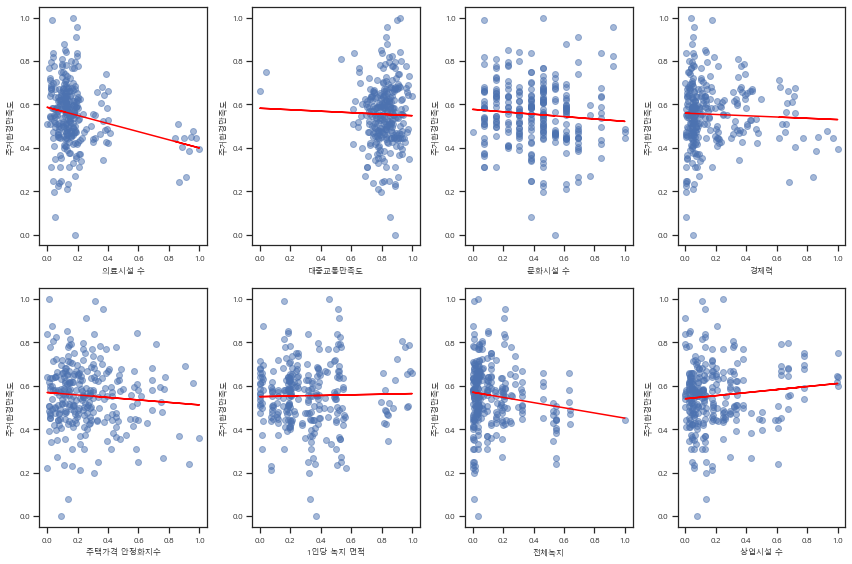

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_data = df_a_normalized[cols[:8]]
y_data = df_a_normalized['주거환경만족도']
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("오차율: ",rmse)
print("회귀 계수 (가중치):")

for i, col in enumerate(cols[:8]):
    print("{}: {:.2f}".format(col, lr.coef_[i]))

# Create subplots for each feature
fig, axes = plt.subplots(2, 4, figsize=(12, 8))
axes = axes.flatten()

# Plot scatter plots with linear regression line for each feature
for i, col in enumerate(cols[:8]):
    ax = axes[i]
    ax.scatter(x_data[col], y_data, alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('주거환경만족도')
    # Fit linear regression line
    lr = LinearRegression()
    lr.fit(x_data[[col]], y_data)
    y_pred = lr.predict(x_data[[col]])
    ax.plot(x_data[col], y_pred, color='red')
plt.tight_layout()
plt.show()